In [1]:
## Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from scipy import stats

C:\Users\mbkhn\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
## Loading
df = pd.read_csv('Country-data.csv')

In [3]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
df.shape

(167, 10)

In [6]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


seems like outliers

In [7]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [8]:
# Calculate z-scores for each numeric column
z_scores = stats.zscore(df.select_dtypes(include=np.number))

# Define threshold for identifying outliers (e.g., z-score > 3 or < -3)
threshold = 3

# Find indices of outliers for each column
outlier_indices = np.where(np.abs(z_scores) > threshold)

# Extract rows with outliers
outlier_rows = df.iloc[outlier_indices[0]]

print("Rows with outliers:")
outlier_rows

Rows with outliers:


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300
66,Haiti,208.0,15.3,6.91,64.7,1500,5.450,32.1,3.33,662
66,Haiti,208.0,15.3,6.91,64.7,1500,5.450,32.1,3.33,662
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100


In [9]:
## Run only one 

#Remove rows with outliers and create a new DataFrame
#clean_df = df.drop(outlier_rows.index)

#Not removing cause that may diminish the scale of impact
clean_df = df

In [10]:
clean_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Relation Analysis

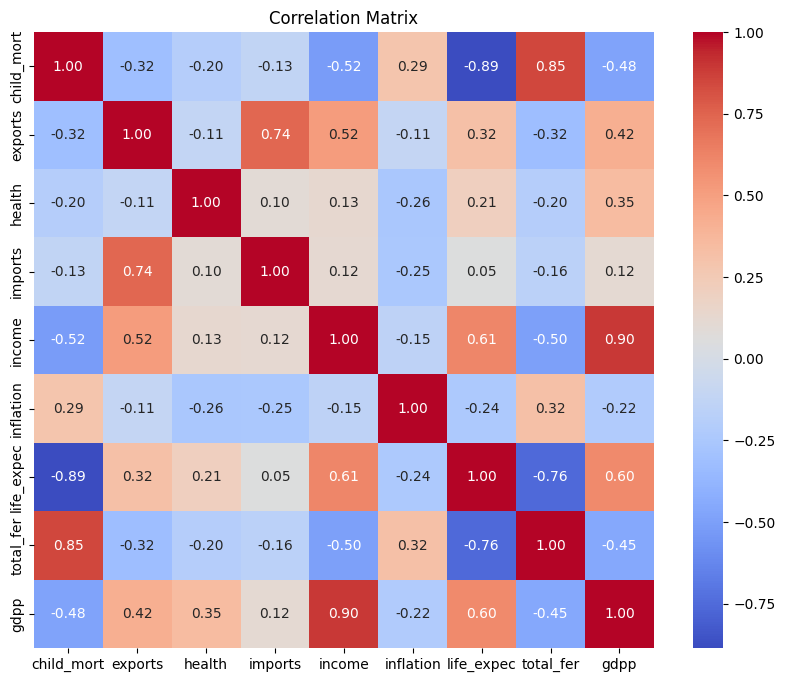

In [11]:
# Select only numeric columns for correlation analysis
numeric_df = clean_df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


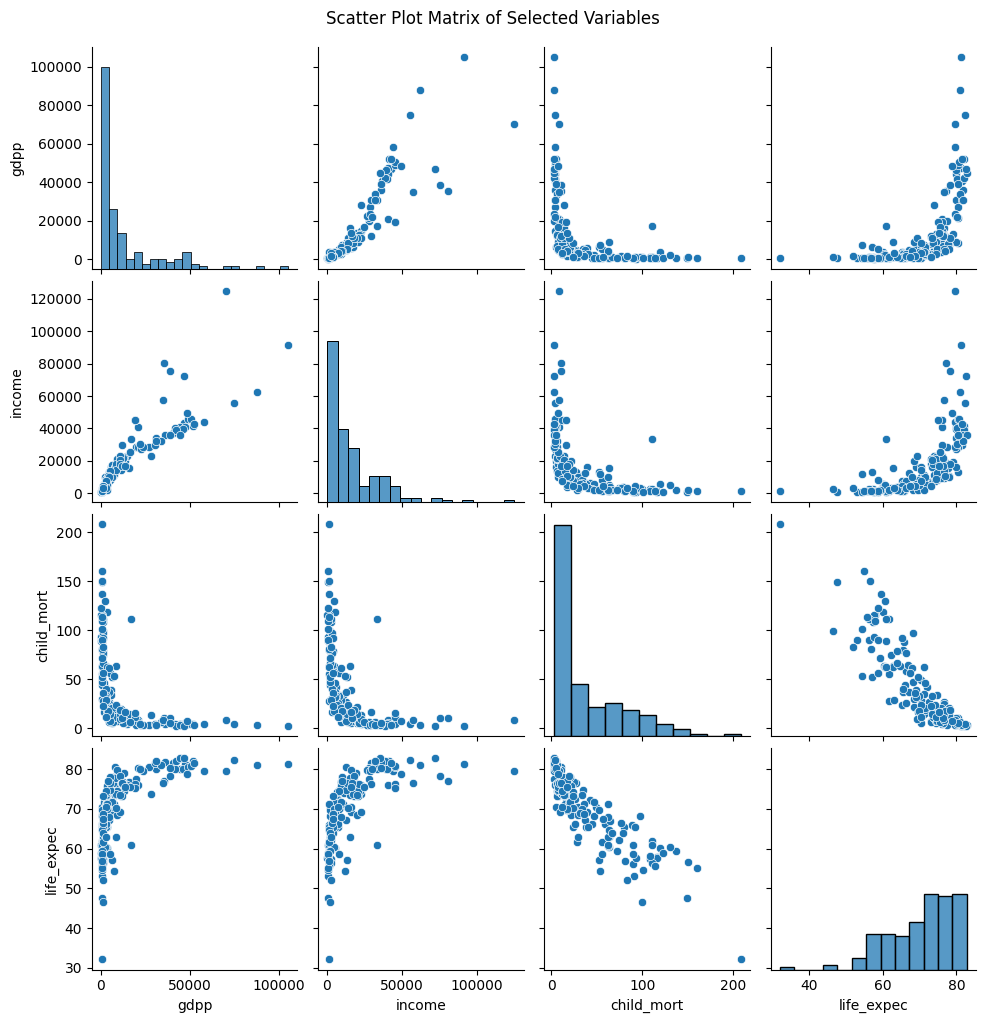

In [12]:
# Scatter plot matrix of selected variables
sns.pairplot(clean_df[['gdpp', 'income', 'child_mort', 'life_expec']])
plt.suptitle('Scatter Plot Matrix of Selected Variables', y=1.02)
plt.show()

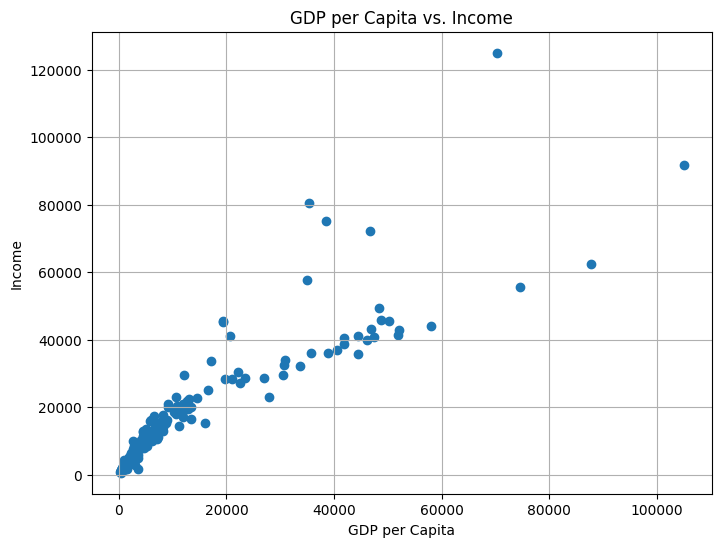

In [13]:
# Scatter plot between 'gdpp' and 'income'
plt.figure(figsize=(8, 6))
plt.scatter(clean_df['gdpp'], clean_df['income'])
plt.title('GDP per Capita vs. Income')
plt.xlabel('GDP per Capita')
plt.ylabel('Income')
plt.grid(True)
plt.show()

C:\Users\mbkhn\AppData\Local\Temp\ipykernel_472\1464600797.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gdpp', y='country', data=top_df, orient='h', palette='viridis')


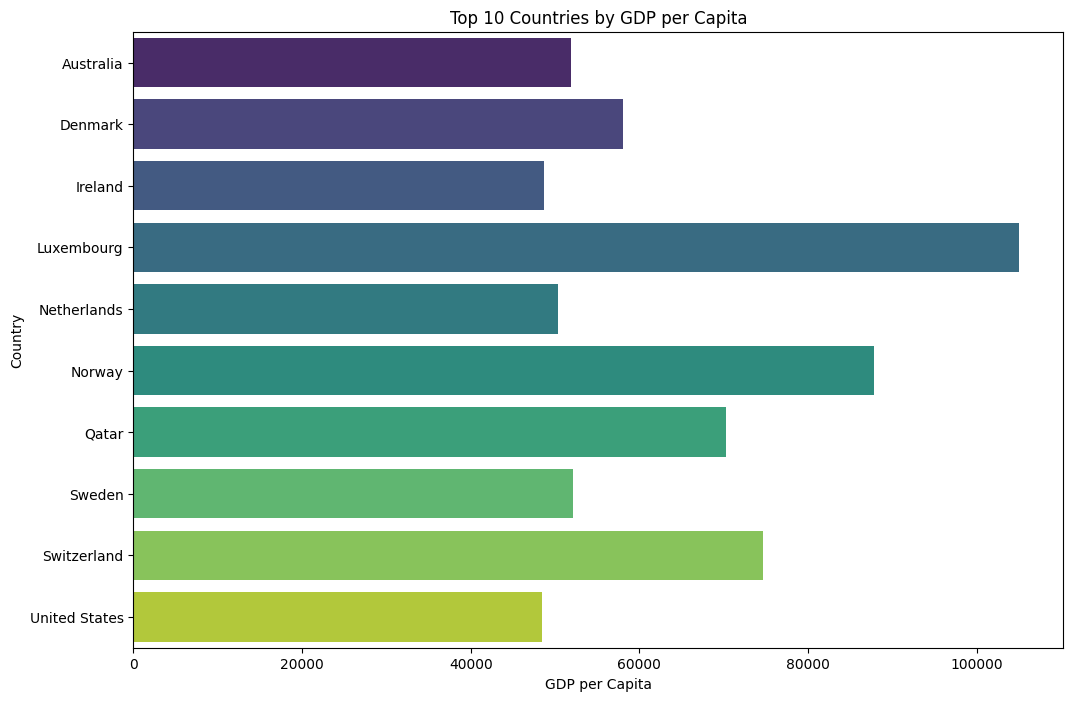

In [14]:
# Define the top 10 countries
top_n = 10 

# Sort the DataFrame by GDP per capita in descending order
sorted_df = clean_df.groupby('country')['gdpp'].mean().sort_values(ascending=False)

# Select the top N countries based on GDP per capita
top_countries = sorted_df.head(top_n).index

# Filter the DataFrame to include only the top N countries
top_df = clean_df[clean_df['country'].isin(top_countries)]

# Visualize the relationship between the top N countries and GDP per capita
plt.figure(figsize=(12, 8))
sns.barplot(x='gdpp', y='country', data=top_df, orient='h', palette='viridis')
plt.title(f'Top {top_n} Countries by GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Country')
plt.show()


C:\Users\mbkhn\AppData\Local\Temp\ipykernel_472\639128152.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='country', data=top_df, orient='h', palette='viridis')


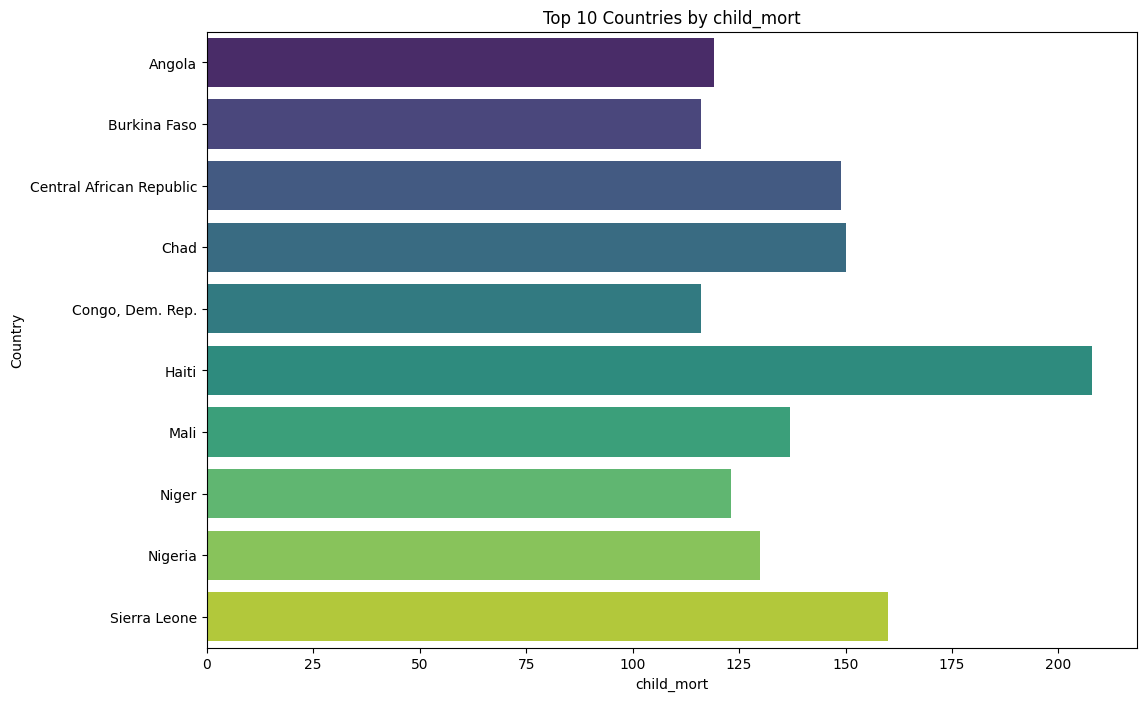

C:\Users\mbkhn\AppData\Local\Temp\ipykernel_472\639128152.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='country', data=top_df, orient='h', palette='viridis')


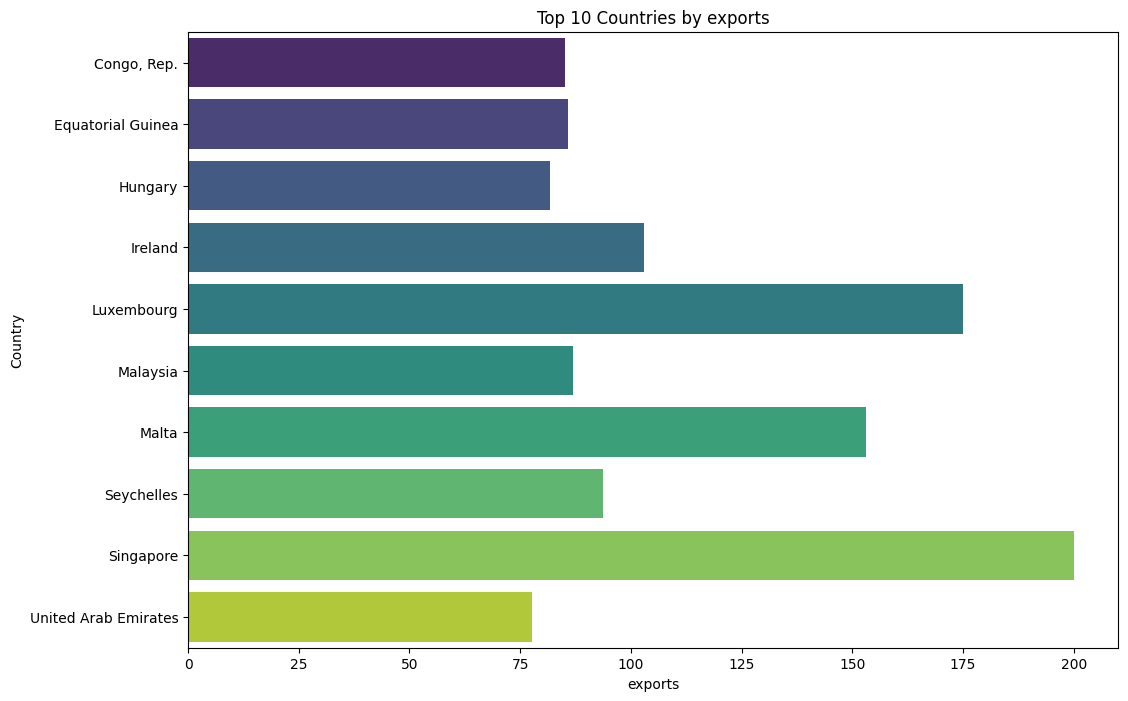

C:\Users\mbkhn\AppData\Local\Temp\ipykernel_472\639128152.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='country', data=top_df, orient='h', palette='viridis')


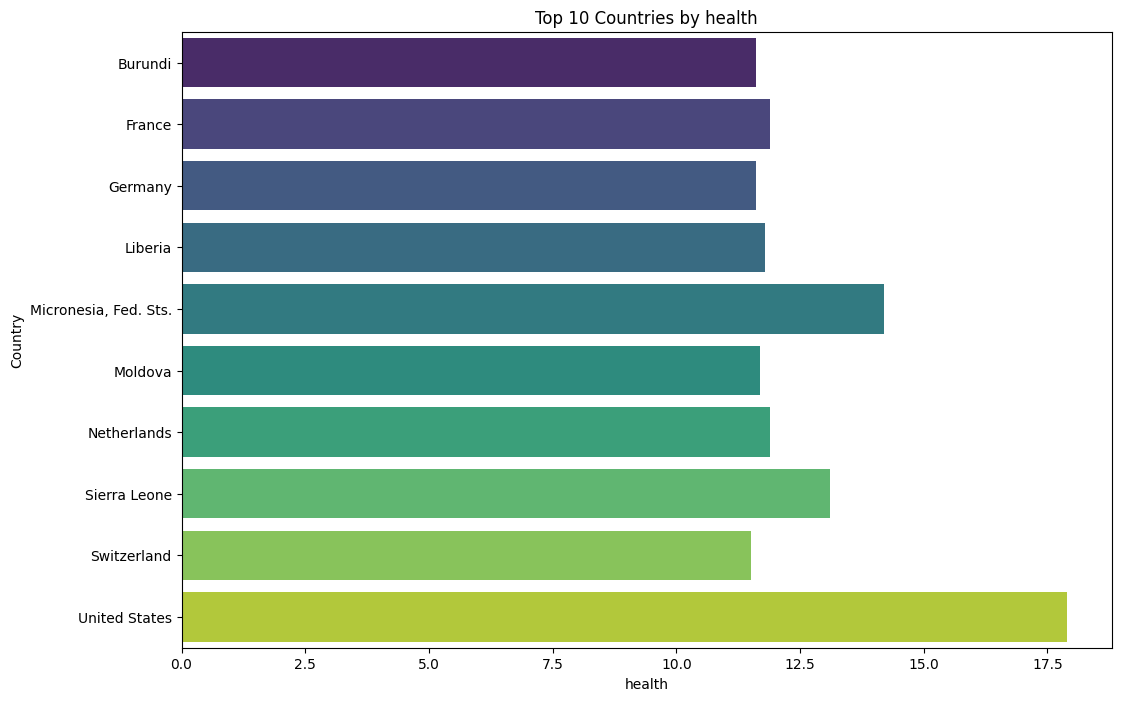

C:\Users\mbkhn\AppData\Local\Temp\ipykernel_472\639128152.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='country', data=top_df, orient='h', palette='viridis')


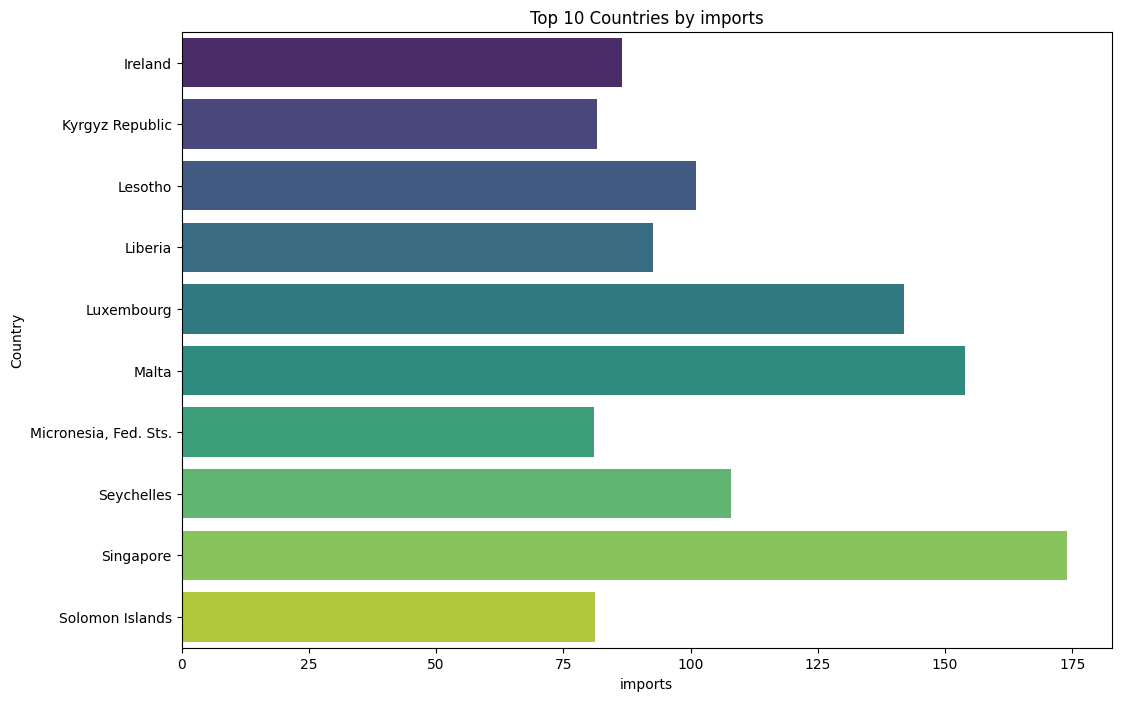

C:\Users\mbkhn\AppData\Local\Temp\ipykernel_472\639128152.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='country', data=top_df, orient='h', palette='viridis')


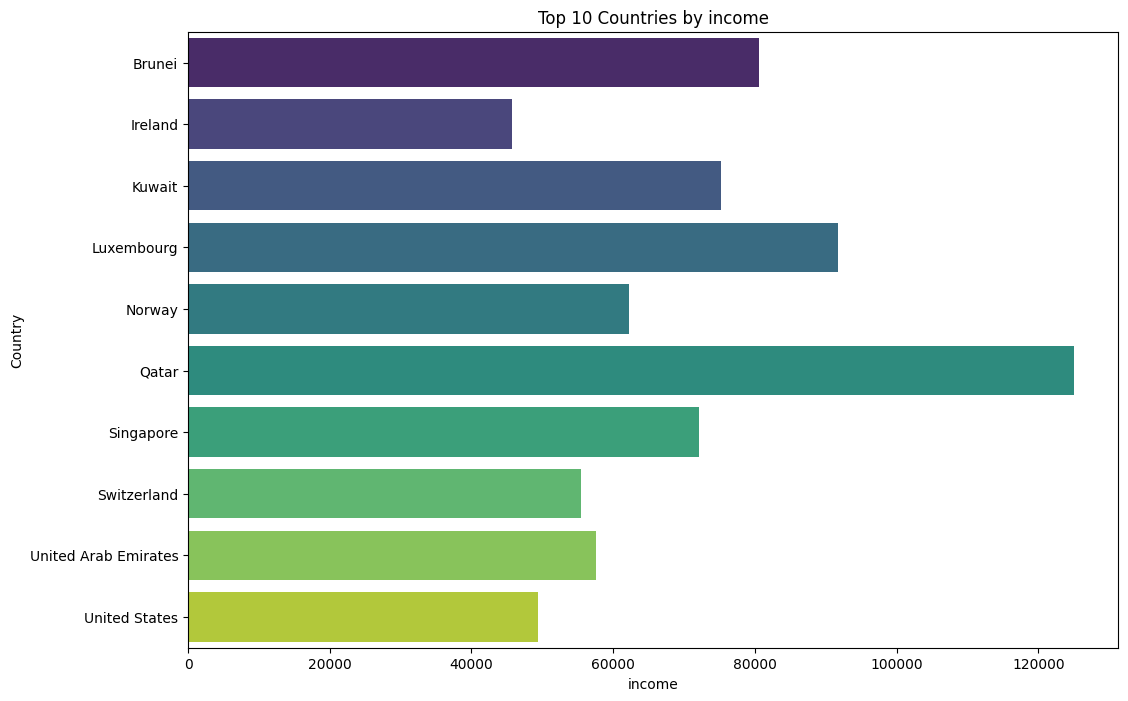

C:\Users\mbkhn\AppData\Local\Temp\ipykernel_472\639128152.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='country', data=top_df, orient='h', palette='viridis')


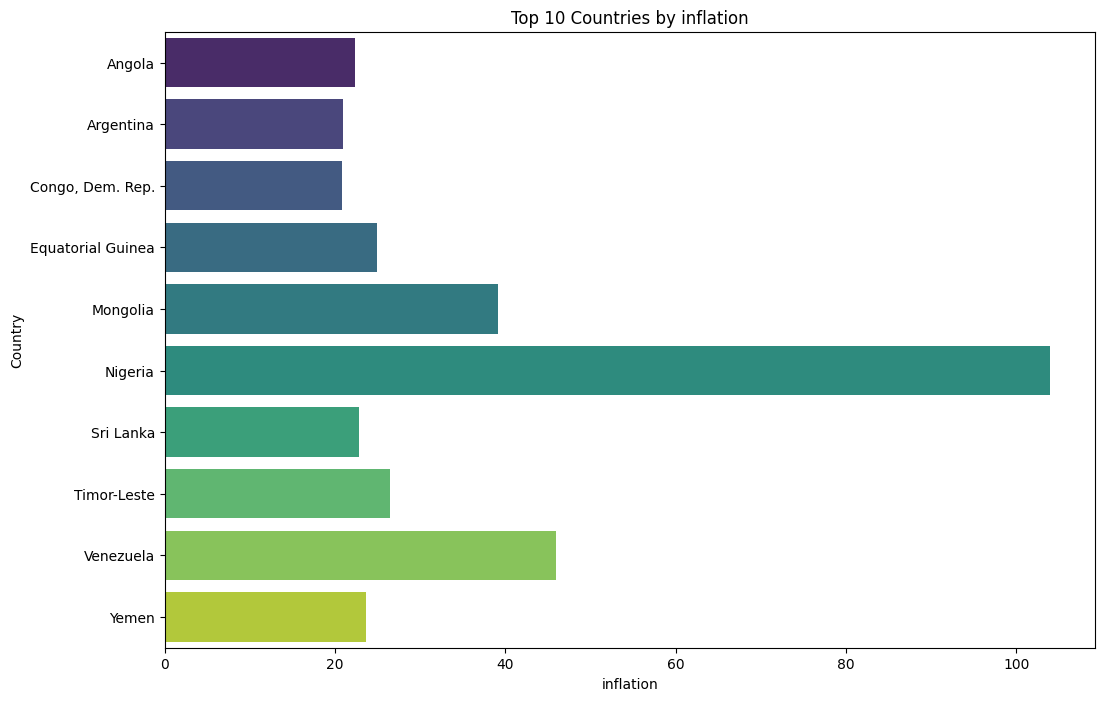

C:\Users\mbkhn\AppData\Local\Temp\ipykernel_472\639128152.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='country', data=top_df, orient='h', palette='viridis')


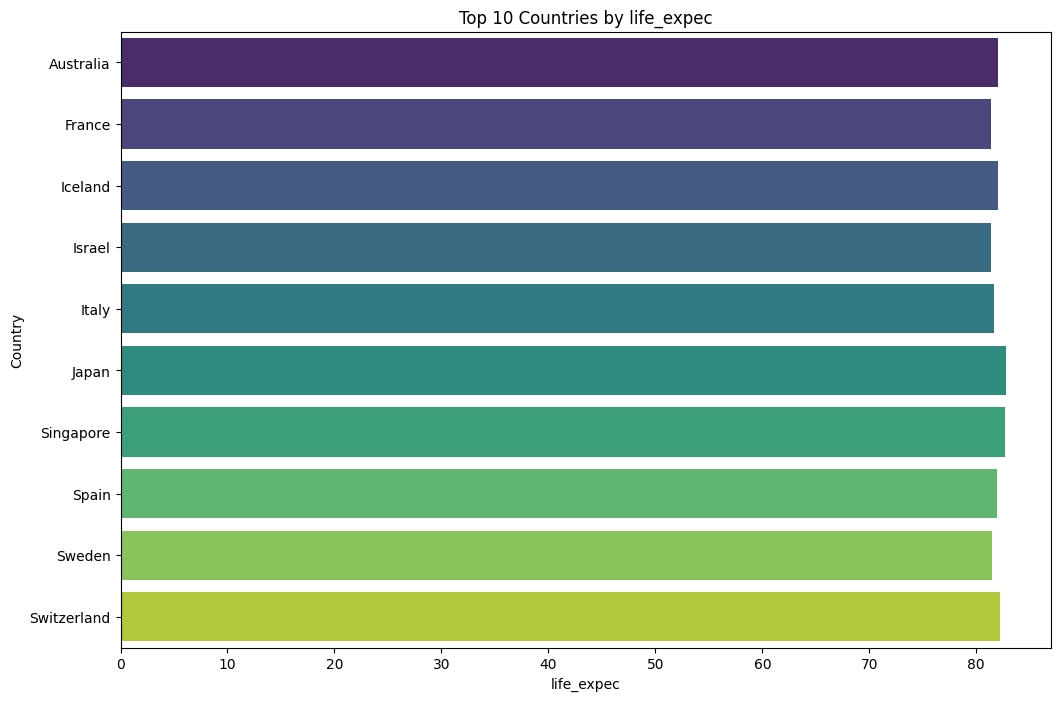

C:\Users\mbkhn\AppData\Local\Temp\ipykernel_472\639128152.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='country', data=top_df, orient='h', palette='viridis')


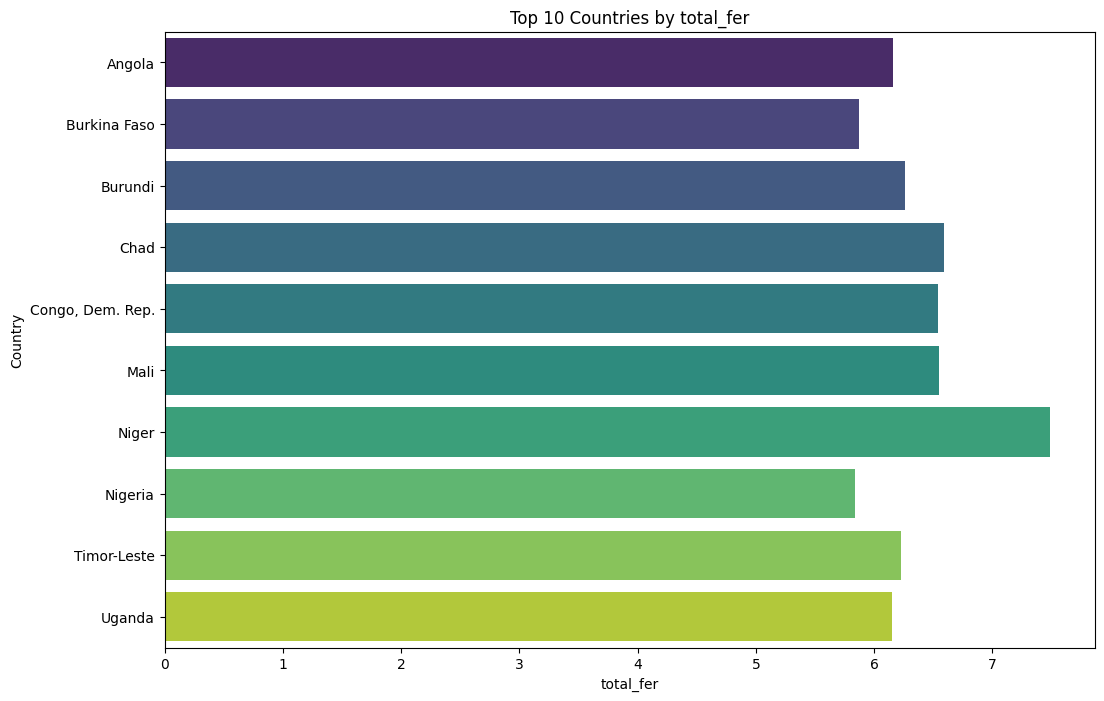

C:\Users\mbkhn\AppData\Local\Temp\ipykernel_472\639128152.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='country', data=top_df, orient='h', palette='viridis')


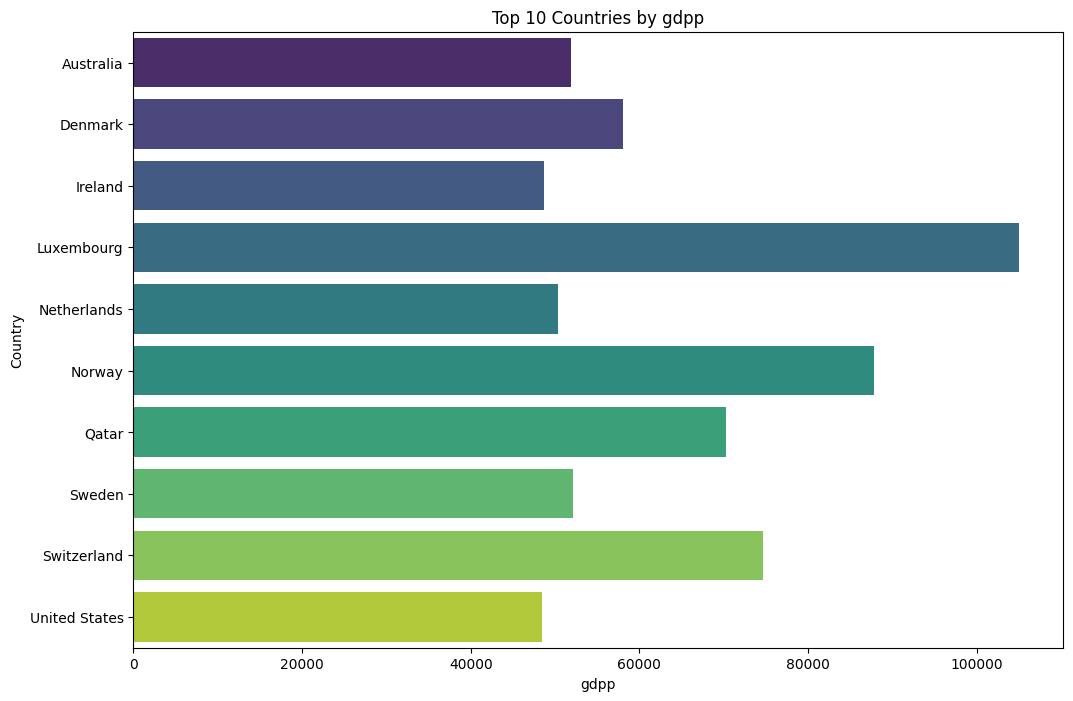

In [15]:
# Define the top N countries
top_n = 10 

# Iterate over each numeric column
for column in clean_df.select_dtypes(include=['float64', 'int64']).columns:
    # Sort the DataFrame by the current column in descending order
    sorted_df = clean_df.groupby('country')[column].mean().sort_values(ascending=False)

    # Select the top N countries based on the current column
    top_countries = sorted_df.head(top_n).index

    # Filter the DataFrame to include only the top N countries
    top_df = clean_df[clean_df['country'].isin(top_countries)]

    # Visualize the relationship between the top N countries and the current column
    plt.figure(figsize=(12, 8))
    sns.barplot(x=column, y='country', data=top_df, orient='h', palette='viridis')
    plt.title(f'Top {top_n} Countries by {column}')
    plt.xlabel(column)
    plt.ylabel('Country')
    plt.show()


In [16]:
# Select relevant numeric features for clustering
numeric_cols = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
data = df[numeric_cols]

# Data preprocessing: Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


In [17]:
# Choosing the number of clusters (K)
k = 3

In [18]:
# Initializing and fit K-means clustering algorithm
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_data)

C:\Users\mbkhn\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [19]:
# Add cluster labels to the original DataFrame
df['cluster'] = kmeans.labels_

In [20]:
# Analyze the clusters
cluster_analysis = df.groupby('cluster')[numeric_cols].mean()
cluster_analysis

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster,,,,,,,,,
0,22.456977,40.273128,6.251047,47.362394,12321.744186,7.720884,72.566279,2.340349,6461.767442
1,5.000000,58.738889,8.807778,51.491667,45672.222222,2.671250,80.127778,1.752778,42494.444444
2,95.106667,28.602444,6.301111,42.306667,3539.844444,11.986778,59.055556,5.065333,1766.711111


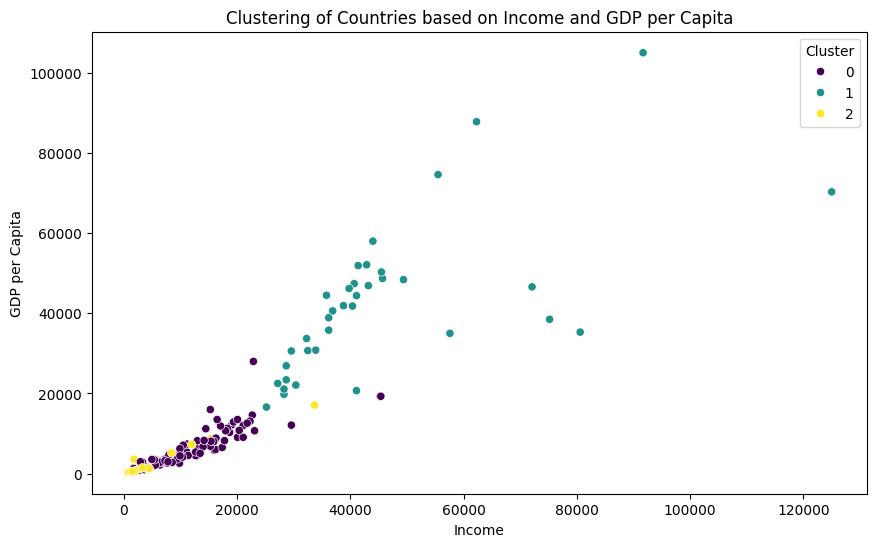

In [21]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='income', y='gdpp', hue='cluster', palette='viridis')
plt.title('Clustering of Countries based on Income and GDP per Capita')
plt.xlabel('Income')
plt.ylabel('GDP per Capita')
plt.legend(title='Cluster')
plt.show()

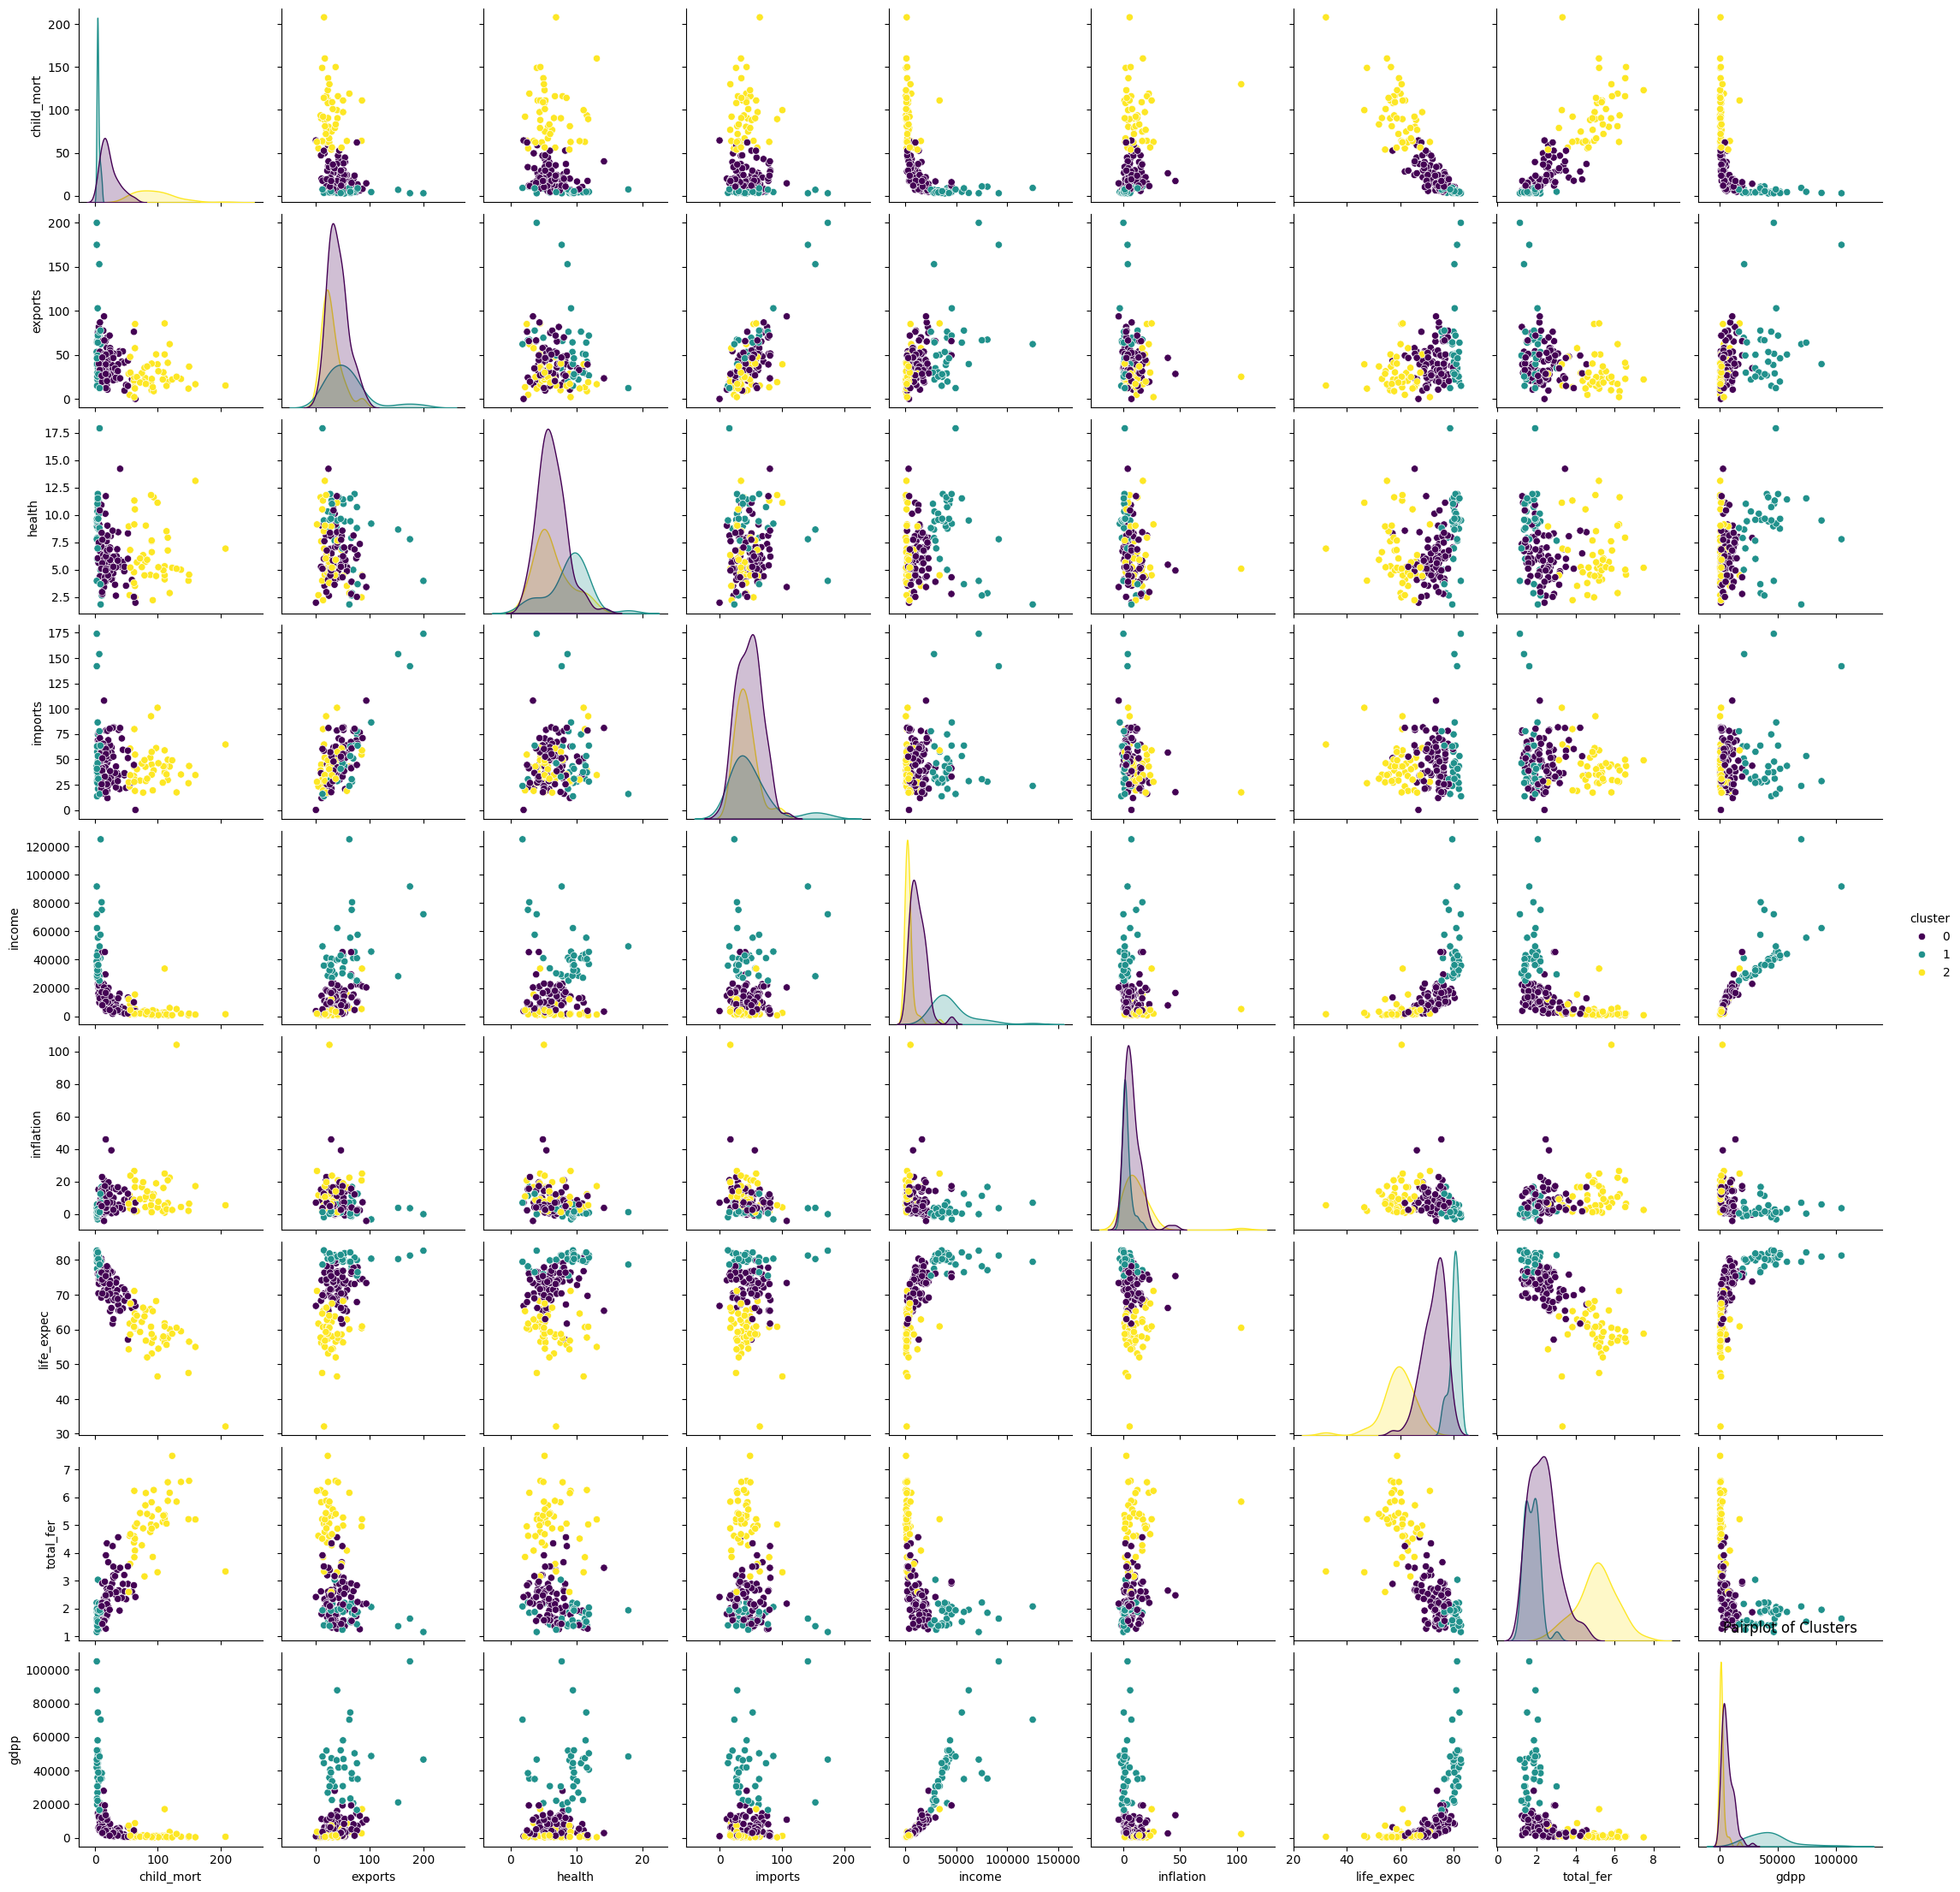

In [22]:
# Visualize clusters using pairplot or scatter plots
sns.pairplot(df, hue='cluster', palette='viridis')
plt.title('Pairplot of Clusters')
plt.show()

In [23]:
# Exclude non-numeric columns before computing the mean
numeric_columns = df.select_dtypes(include=[np.number]).columns
cluster_means = df.groupby('cluster')[numeric_columns].mean()

# Print the characteristics of each cluster
cluster_means

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
cluster,,,,,,,,,,
0,22.456977,40.273128,6.251047,47.362394,12321.744186,7.720884,72.566279,2.340349,6461.767442,0.0
1,5.000000,58.738889,8.807778,51.491667,45672.222222,2.671250,80.127778,1.752778,42494.444444,1.0
2,95.106667,28.602444,6.301111,42.306667,3539.844444,11.986778,59.055556,5.065333,1766.711111,2.0


In [24]:
cluster_of_interest = cluster_means.idxmin()
countries_in_need = df[df['cluster'] == cluster_of_interest[2]]['country'].tolist()
print(f"Countries in dire need of aid:")
countries_in_need

Countries in dire need of aid:


C:\Users\mbkhn\AppData\Local\Temp\ipykernel_472\570948447.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  countries_in_need = df[df['cluster'] == cluster_of_interest[2]]['country'].tolist()


['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bahamas',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Georgia',
 'Grenada',
 'Guatemala',
 'Guyana',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kyrgyz Republic',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Mauritius',
 'Micronesia, Fed. Sts.',
 'Moldova',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Myanmar',
 'Nepal',
 'Oman',
 'Panama',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Romania',
 'Russia',
 'Samoa',
 'Saudi Arabia',
 'Serbia',
 'Seychelles',
 'Solomon Islands',
 'Sri Lanka',
 'St. Vincent and the Grenadines',
 'Suriname

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [26]:
features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

In [27]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clean_df[features])

In [28]:
# Performing hierarchical clustering
linked = linkage(scaled_data, method='ward')

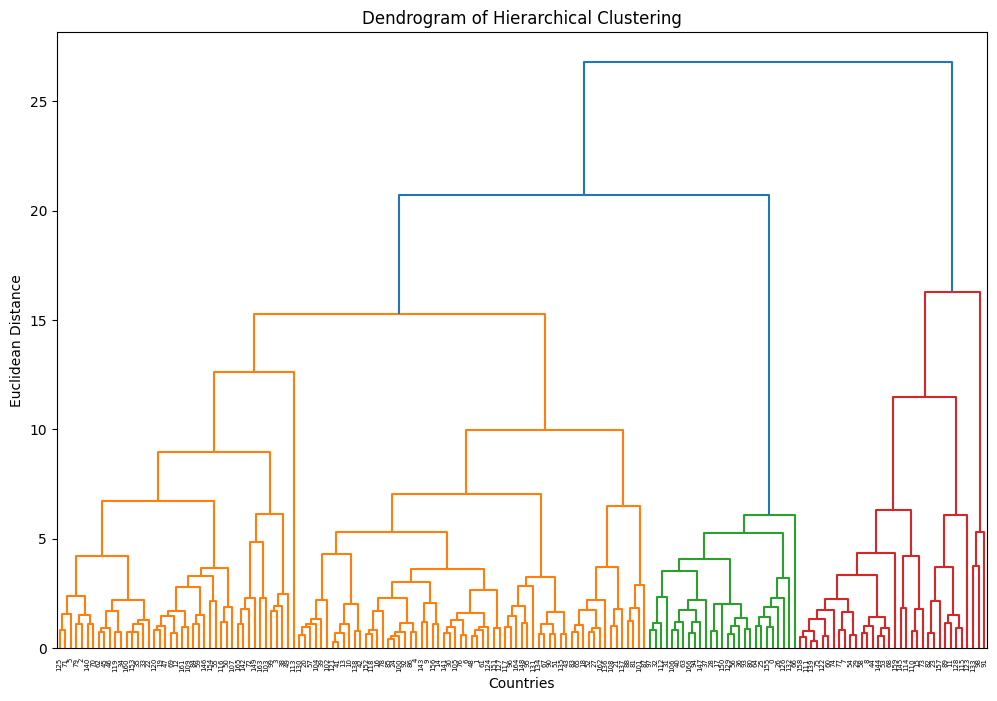

In [29]:
# Visualizing the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram of Hierarchical Clustering')
plt.xlabel('Countries')
plt.ylabel('Euclidean Distance')
plt.show()

In [30]:
# Implementing hierarchical clustering with the optimal number of clusters
from sklearn.cluster import AgglomerativeClustering

In [31]:
n_clusters = 3

In [32]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
cluster_labels = hierarchical_cluster.fit_predict(scaled_data)

In [33]:
# Adding cluster labels to the DataFrame
clean_df['clusterH'] = cluster_labels

In [34]:
# Exclude non-numeric columns before computing the mean
numeric_columns = clean_df.select_dtypes(include=[np.number]).columns
cluster_means = clean_df.groupby('clusterH')[numeric_columns].mean()
cluster_means

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,clusterH
clusterH,,,,,,,,,,,
0,5.961765,58.508824,8.501176,48.902941,47588.235294,4.115500,79.982353,1.888529,43170.588235,0.911765,0.0
1,31.617925,39.990368,6.353679,48.085527,11341.886792,9.120604,70.921698,2.654623,6407.367925,0.386792,1.0
2,105.070370,23.589630,6.507037,39.662963,1589.740741,7.142778,57.248148,5.433704,667.888889,2.000000,2.0


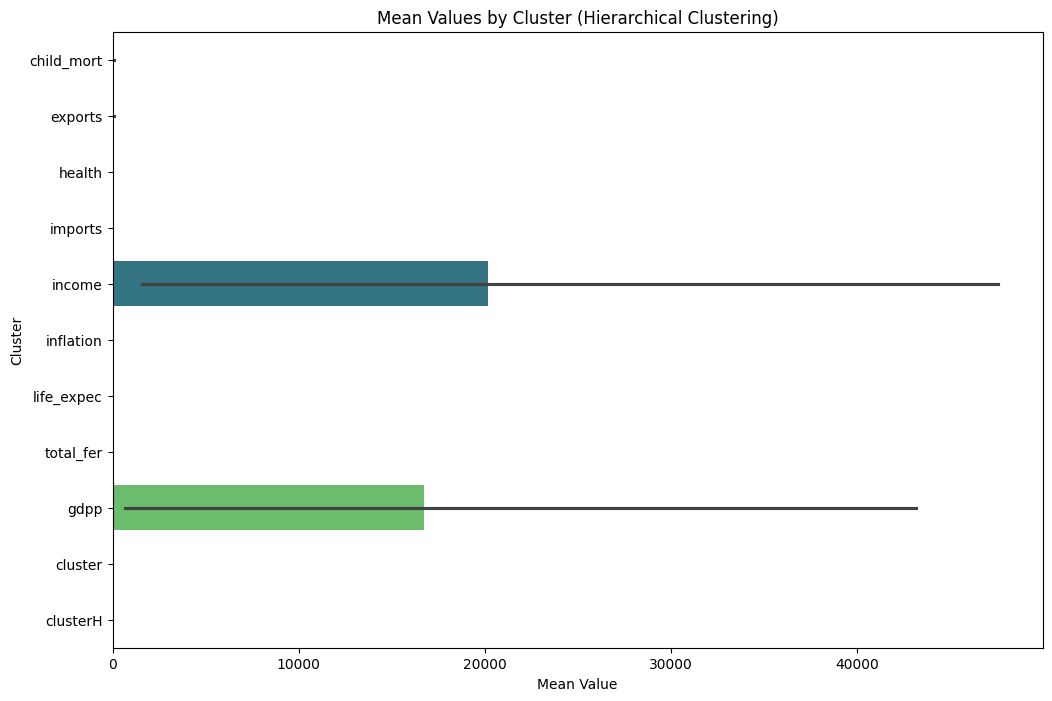

In [35]:
plt.figure(figsize=(12, 8))
sns.barplot(data=cluster_means, orient='h', palette='viridis')
plt.title('Mean Values by Cluster (Hierarchical Clustering)')
plt.xlabel('Mean Value')
plt.ylabel('Cluster')
plt.show()

In [36]:
from sklearn.decomposition import PCA

# Reduce dimensions for visualization using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

In [37]:
# Add cluster labels to the reduced data
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['ClusterH'] = cluster_labels

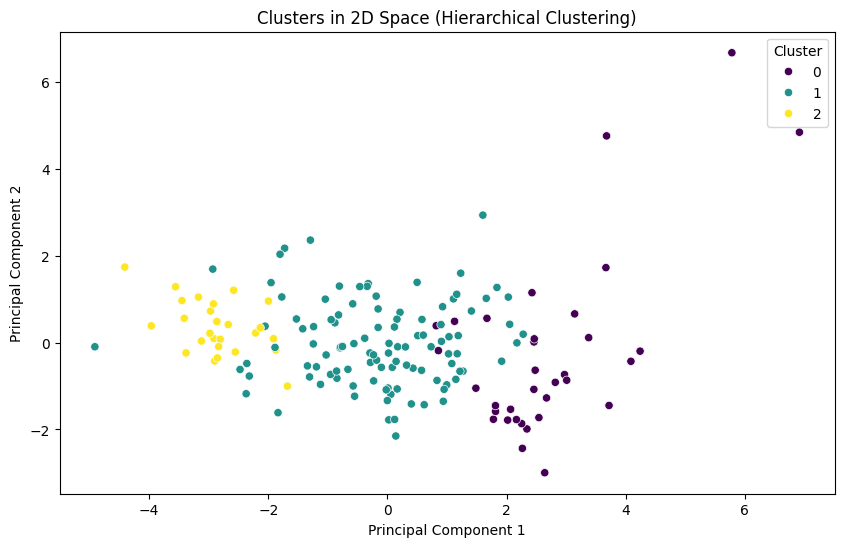

In [38]:
# Plot clusters in 2D space
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='ClusterH', palette='viridis', legend='full')
plt.title('Clusters in 2D Space (Hierarchical Clustering)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [39]:
cluster_of_interest = cluster_means.idxmin()
countries_in_needH = df[df['clusterH'] == cluster_of_interest[2]]['country'].tolist()
print(f"Countries in dire need of aid:")
countries_in_needH

Countries in dire need of aid:


C:\Users\mbkhn\AppData\Local\Temp\ipykernel_472\4275627451.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  countries_in_needH = df[df['clusterH'] == cluster_of_interest[2]]['country'].tolist()


['Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bahamas',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Congo, Rep.',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Fiji',
 'Gabon',
 'Georgia',
 'Ghana',
 'Grenada',
 'Guatemala',
 'Guyana',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kiribati',
 'Kyrgyz Republic',
 'Lao',
 'Latvia',
 'Lebanon',
 'Lesotho',
 'Liberia',
 'Lithuania',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Mauritania',
 'Mauritius',
 'Micronesia, Fed. Sts.',
 'Moldova',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Myanmar',
 'Namibia',
 'Nepal',
 'Nigeria',
 'Pakistan',
 'Panama',
 'Paraguay',
 '

In [42]:
# Ensure both lists have the same length
min_length = min(len(countries_in_need), len(countries_in_needH))
countries_in_need = countries_in_need[:min_length]
countries_in_needH = countries_in_needH[:min_length]

# Create a DataFrame to compare the results
comparison_df = pd.DataFrame({
    'K Means': countries_in_need,
    'Hierarchical': countries_in_needH
})

# Display the DataFrame
comparison_df.head(10)


,K Means,Hierarchical
0,Albania,Albania
1,Algeria,Algeria
2,Antigua and Barbuda,Angola
3,Argentina,Antigua and Barbuda
4,Armenia,Argentina
5,Azerbaijan,Armenia
6,Bahamas,Azerbaijan
7,Bangladesh,Bahamas
8,Barbados,Bangladesh
9,Belarus,Barbados
